<a href="https://colab.research.google.com/github/ewuerfel66/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/EricWuerfel_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statistics import median, mean

In [0]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

### - Load the data as a `pandas` data frame and add informative names to the features.

In [4]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header = None)
df.columns = ['age', 'operation_year', 'pos_ax_nodes', 'survival_status']
df.head(20)

,age,operation_year,pos_ax_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


### - Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).

From UCI: 306 instances



In [9]:
df.count

<bound method DataFrame.count of      age  operation_year  pos_ax_nodes  survival_status
0     30              64             1                1
1     30              62             3                1
2     30              65             0                1
3     31              59             2                1
4     31              65             4                1
5     33              58            10                1
6     33              60             0                1
7     34              59             0                2
8     34              66             9                2
9     34              58            30                1
10    34              60             1                1
11    34              61            10                1
12    34              67             7                1
13    34              60             0                1
14    35              64            13                1
15    35              63             0                1
16    36       

We have the **correct count**

### - Validate that there are **no missing values**

In [10]:
df.isnull().sum()

age                0
operation_year     0
pos_ax_nodes       0
survival_status    0
dtype: int64

There doesn't seem to be any missing values. Looking through the dataset, I don't see any "?"s ot "n/a"s.

### - Change the survival variable accordingly

In [0]:
df.head(9)

In [11]:
type(df.survival_status[1])

numpy.int64

In [0]:
def two_to_zero(value):
  if value == 2:
    return(0)
  if value == 1:
    return(1)

In [0]:
df.survival_status = df.survival_status.apply(two_to_zero)

### Part 1 Result

In [24]:
df.head(9)

,age,operation_year,pos_ax_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

Let's take a look at some **Descriptive Stats** first

In [25]:
df.describe()

,age,operation_year,pos_ax_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


### Let's search for relationships using a **pairplot**

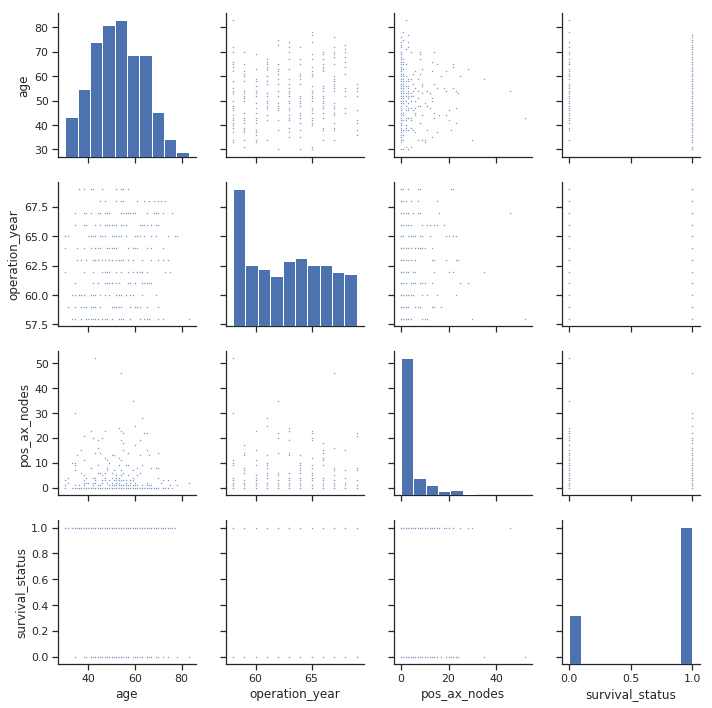

In [31]:
sns.set(style='ticks', color_codes=True)
graph = sns.pairplot(df, plot_kws={"s": 3})

### Let's make some **Crosstabs**

**Age**

In [63]:
age_bins = pd.cut(df['age'], 10)
pd.crosstab(age_bins, df.survival_status)

survival_status,0,1
age,,
"(29.947, 35.3]",2,14
"(35.3, 40.6]",2,25
"(40.6, 45.9]",15,31
"(45.9, 51.2]",16,37
"(51.2, 56.5]",18,37
"(56.5, 61.8]",9,32
"(61.8, 67.1]",12,29
"(67.1, 72.4]",4,14
"(72.4, 77.7]",1,6


**pos_ax_nodes**

In [65]:
pos_ax_nodes_bins = pd.cut(df['pos_ax_nodes'], 10)
pd.crosstab(pos_ax_nodes_bins, df.survival_status)

survival_status,0,1
pos_ax_nodes,,
"(-0.052, 5.2]",46,190
"(5.2, 10.4]",12,18
"(10.4, 15.6]",11,7
"(15.6, 20.8]",4,4
"(20.8, 26.0]",6,3
"(26.0, 31.2]",0,2
"(31.2, 36.4]",1,0
"(41.6, 46.8]",0,1
"(46.8, 52.0]",1,0


**Operation year**

In [71]:
operation_year_bins = pd.cut(df['operation_year'], 11)
pd.crosstab(operation_year_bins, df.survival_status)

survival_status,0,1
operation_year,,
"(57.989, 59.0]",21,42
"(59.0, 60.0]",4,24
"(60.0, 61.0]",3,23
"(61.0, 62.0]",7,16
"(62.0, 63.0]",8,22
"(63.0, 64.0]",8,23
"(64.0, 65.0]",13,15
"(65.0, 66.0]",6,22
"(66.0, 67.0]",4,21


From this crosstab, it seems that the amount of people who survived for >= 5 years has remained steady while the amoutn who didn't make it >= 5 years, has started to go down. This means that the survival rate over time is increasing suggesting **a positive relationship between operation_year and survival_status**

### Let's seperate the df into two df's split by survival_status . . .

In [0]:
survived_df = df[df['survival_status']==1]
rip_df = df[df['survival_status']==0]

In [74]:
survived_df.describe()

,age,operation_year,pos_ax_nodes,survival_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [75]:
rip_df.describe()

,age,operation_year,pos_ax_nodes,survival_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,0.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,0.0
25%,46.000000,59.000000,1.000000,0.0
50%,53.000000,63.000000,4.000000,0.0
75%,61.000000,65.000000,11.000000,0.0
max,83.000000,69.000000,52.000000,0.0


### . . . and compare the distributions

#### Age

The histogram for survival_status=1 is in BLUE.
The histogram for survival_status=0 is in ORANGE.


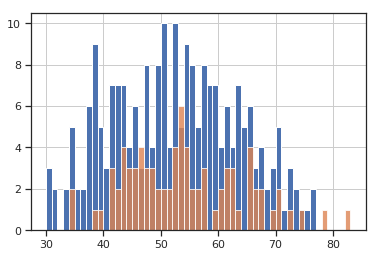

In [77]:
survived_df.age.hist(bins=47);
rip_df.age.hist(alpha=0.8, bins=49);

print('The histogram for survival_status=1 is in BLUE.')
print('The histogram for survival_status=0 is in ORANGE.')

In [47]:
print('The mean age of for survival_status=1 is:', survived_df.age.mean())
print('The mean age of for survival_status=0 is:', rip_df.age.mean())

The mean age of for survival_status=1 is: 52.01777777777778
The mean age of for survival_status=0 is: 53.67901234567901


In [48]:
print('The median age of for survival_status=1 is:', survived_df.age.median())
print('The median age of for survival_status=0 is:', rip_df.age.median())

The median age of for survival_status=1 is: 52.0
The median age of for survival_status=0 is: 53.0


This suggests that the distribution for survival_status = 0 is skewed a bit to the right. Looking at the histogram above, you can see that there is only an orange bin(survival_status=0) at the highest ages.

Those who had surgery above the age of ~77 all passed away within 5 years of the surgery. This is not surprising, seeing as they are just past or around the average life expectancy anyways (that sounds dark but it's true).

As the other side of this coin, those who had an operation under the age of ~35 overwhelmingly survived for more than 5 years after the surgery.

#### Positive Axillary Nodes

The histogram for survival_status=1 is in BLUE.
The histogram for survival_status=0 is in ORANGE.


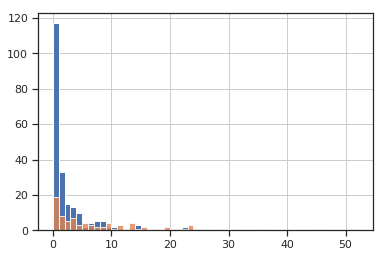

In [78]:
survived_df.pos_ax_nodes.hist(bins=46);
rip_df.pos_ax_nodes.hist(alpha=0.8, bins=52);

print('The histogram for survival_status=1 is in BLUE.')
print('The histogram for survival_status=0 is in ORANGE.')

We can see from the superimposed normalised histograms that a higher proportion of those who survived for >= 5 years had less than ~5 positive axillary nodes. A higher proportion of those who didn't make it to 5 years after the surgery had >5 positive axillary nodes.

This suggests that a lower number of positive axillary nodes might make you more likely to survive >= 5 years after the surgery. In other words, this suggests **a negative relationship between positive axillary nodes and survival_status**

#### Operation Year

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


The histogram for survival_status=1 is in BLUE.
The histogram for survival_status=0 is in ORANGE.


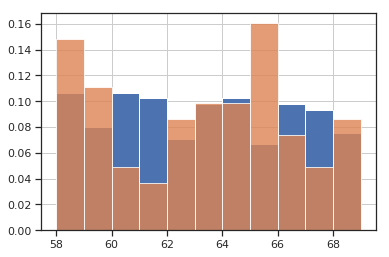

In [72]:
survived_df.operation_year.hist(normed=True, bins=11);
rip_df.operation_year.hist(alpha=0.8, normed=True, bins=11);

print('The histogram for survival_status=1 is in BLUE.')
print('The histogram for survival_status=0 is in ORANGE.')

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

### It looks like **operation_year and survival_status** have a positive (direct) relationship.

In [67]:
operation_year_bins = pd.cut(df['operation_year'], 10)
pd.crosstab(operation_year_bins, df.survival_status)

survival_status,0,1
operation_year,,
"(57.989, 59.1]",21,42
"(59.1, 60.2]",4,24
"(60.2, 61.3]",3,23
"(61.3, 62.4]",7,16
"(62.4, 63.5]",8,22
"(63.5, 64.6]",8,23
"(64.6, 65.7]",13,15
"(65.7, 66.8]",6,22
"(66.8, 67.9]",4,21


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


The histogram for survival_status=1 is in BLUE.
The histogram for survival_status=0 is in ORANGE.


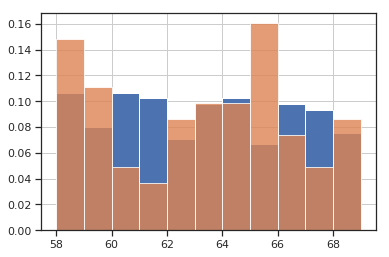

In [80]:
survived_df.operation_year.hist(normed=True, bins=11);
rip_df.operation_year.hist(alpha=0.8, normed=True, bins=11);

print('The histogram for survival_status=1 is in BLUE.')
print('The histogram for survival_status=0 is in ORANGE.')

From this crosstab, it seems that the amount of people who survived for >= 5 years has remained steady while the amoutn who didn't make it >= 5 years, has started to go down. This means that the survival rate over time is increasing suggesting **a positive relationship between operation_year and survival_status**

- What is at least one feature that looks to have a negative relationship with survival?

### It looks like **positive axillary nodes and survival_status** have a negative (inverse) relationship.

In [69]:
pos_ax_nodes_bins = pd.cut(df['pos_ax_nodes'], 10)
pd.crosstab(pos_ax_nodes_bins, df.survival_status)

survival_status,0,1
pos_ax_nodes,,
"(-0.052, 5.2]",46,190
"(5.2, 10.4]",12,18
"(10.4, 15.6]",11,7
"(15.6, 20.8]",4,4
"(20.8, 26.0]",6,3
"(26.0, 31.2]",0,2
"(31.2, 36.4]",1,0
"(41.6, 46.8]",0,1
"(46.8, 52.0]",1,0


The histogram for survival_status=1 is in BLUE.
The histogram for survival_status=0 is in ORANGE.


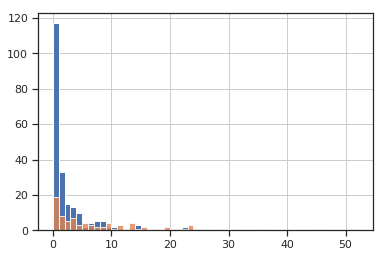

In [79]:
survived_df.pos_ax_nodes.hist(bins=46);
rip_df.pos_ax_nodes.hist(alpha=0.8, bins=52);

print('The histogram for survival_status=1 is in BLUE.')
print('The histogram for survival_status=0 is in ORANGE.')

We can see from the superimposed normalised histograms that a higher proportion of those who survived for >= 5 years had less than ~5 positive axillary nodes. A higher proportion of those who didn't make it to 5 years after the surgery had >5 positive axillary nodes.

This suggests that a lower number of positive axillary nodes might make you more likely to survive >= 5 years after the surgery. In other words, this suggests **a negative relationship between positive axillary nodes and survival_status**

### operation_year and positive axillary nodes might have a positive (direct) relationship

As diagnostic technology has gotten better, it's possible that we're detecting positive axillary nodes at a higher rate than we did in the past. In the early days of colleting this data, doctors may have looked for just one or two positive axillarty nodes before moving to surgery. This would mean that many of the patients in the early days of this surgery would have had more positive axillary nodes than were detected and recorded. This can lead to a **psuedo direct relationship between operation_year and positive axillary nodes**

This would falsely lead us to believe that cancer patients today have many more positive axillary nodes than cancer patients 20 years ago, when in reality we're simply better at detecting them.